In [ ]:
import sys
sys.executable

In [ ]:
#!'/Library/Developer/CommandLineTools/usr/bin/python3' -m pip install smote_variants

In [ ]:
#!'/Library/Developer/CommandLineTools/usr/bin/python3' -m pip install imblearn

In [29]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from numpy import mean
from numpy import std

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

In [30]:
import smote_variants as sv

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [32]:
pd.options.mode.chained_assignment = None

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
clinical = pd.read_csv('/Users/madhuri/Desktop/MasterThesis/Part2/Clinical_9_predictors.csv')

In [35]:
gene_data = pd.read_csv('/Users/madhuri/Desktop/MasterThesis/Part2/final_gene_list.csv')

In [36]:
gene_data.head()

,X217398_x_at,X1007_s_at,X121_at,X200045_at,X200053_at,X200071_at,X200078_s_at,X200083_at,X200617_at,X200621_at,...,X220558_x_at,X220559_at,X220560_at,X220561_at,X220562_at,X220563_s_at,X220564_at,X220565_at,X220566_at,X220567_at
0,14.8671,11.0591,6.8277,9.5294,8.3286,9.3068,9.5442,9.3407,8.9275,10.1233,...,5.1859,4.2881,4.7643,5.2610,5.6335,4.2882,5.2773,5.2037,4.2883,4.2884
1,14.8777,11.1169,6.7891,9.5766,9.0341,9.5069,9.8331,8.8887,8.9703,9.9776,...,4.2640,5.5825,4.6809,4.2366,5.6856,4.6310,4.4076,5.5568,5.0411,4.6777
2,14.8518,10.9811,6.8793,9.3658,8.4623,9.4156,9.5450,9.1866,9.0396,9.9204,...,5.2548,5.1080,5.5434,4.4733,5.4211,5.6083,5.2171,4.4056,4.3341,4.8077
3,14.8416,10.6992,6.8515,9.4089,8.8189,9.3535,9.4884,9.1249,8.9817,10.0511,...,5.3894,4.4339,4.8631,4.5597,5.2773,5.1513,4.6724,4.4341,4.4342,4.4344
4,14.8518,11.0156,6.6954,9.6096,9.2547,9.2254,9.7614,9.2038,9.2665,10.0792,...,5.7820,5.4174,5.8110,4.9831,5.2830,5.3548,4.3360,4.3361,4.5812,4.3363


In [37]:
gene_data.shape

(6802, 20000)

In [38]:
all_data=pd.concat([clinical, gene_data], axis=1)

In [39]:
all_data.describe(include='all')

,DiseaseType,CancerType,SampleType,Gender,Race,Ethnicity,PrimaryDiagnosis,AgeAtDiagnosis,Morphology,TissueOrOrganOfOrigin,...,X220558_x_at,X220559_at,X220560_at,X220561_at,X220562_at,X220563_s_at,X220564_at,X220565_at,X220566_at,X220567_at
count,6802,6802,6802,6774,5901,5249,6617,6718.000000,6774,6617,...,6802.000000,6802.000000,6802.000000,6802.000000,6802.000000,6802.000000,6802.000000,6802.000000,6802.000000,6802.000000
unique,21,10,6,2,6,2,66,NaN,68,46,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,AdenomasAndAdenocarcinomas,Breast,Primary Tumor,male,white,not hispanic or latino,"Adenocarcinoma, NOS",NaN,8140/3,"Breast, NOS",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2963,1485,5519,3589,5047,5034,1414,NaN,1414,1451,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21418.639625,NaN,NaN,...,5.085548,5.379160,5.295996,4.822538,5.279196,4.830820,4.726401,4.779846,5.205246,4.607866
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6081.664912,NaN,NaN,...,0.638095,0.820812,0.845073,0.580413,0.606434,0.492580,0.454465,0.550750,0.602246,0.416202
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.000000,NaN,NaN,...,4.114700,4.118300,4.124400,4.130300,4.175700,4.139700,4.117200,4.115800,4.123100,4.116000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18058.250000,NaN,NaN,...,4.546950,4.722500,4.678600,4.504700,4.943100,4.506225,4.489600,4.496900,4.703450,4.466000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22126.500000,NaN,NaN,...,4.965800,5.262200,5.193700,4.575700,5.265200,4.648200,4.550800,4.551200,5.190600,4.518600
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25682.750000,NaN,NaN,...,5.407850,5.881975,5.562550,5.054100,5.545700,5.094750,4.877275,4.919750,5.572875,4.562700


In [42]:
all_data.isna().sum()

DiseaseType       0
CancerType        0
SampleType        0
Gender           28
Race            901
               ... 
X220563_s_at      0
X220564_at        0
X220565_at        0
X220566_at        0
X220567_at        0
Length: 20010, dtype: int64

In [43]:
all_data.dropna(axis=0, how='any', inplace=True)

In [44]:
all_data.shape

(5068, 20010)

In [46]:
dataframe=all_data

In [47]:
X= dataframe.iloc[:, :-1]
y=dataframe['CancerType']



In [48]:
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,test_size=0.3,random_state=0) 

In [49]:
numerical_ix= X.select_dtypes(include=['int64','float64']).columns
categorical_ix = X.select_dtypes(include=['object', 'bool']).columns


In [50]:
#from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
#one hot encoding categorical predictors
t=[('cat', OneHotEncoder(handle_unknown='ignore'), categorical_ix), ('num', StandardScaler(), numerical_ix)]
col_transform=ColumnTransformer(transformers=t)
X_transform=col_transform.fit_transform(X_train)

In [51]:
X_test=col_transform.transform(X_test)

In [52]:
le = LabelEncoder()
le.fit(y_train)
y_train_enc= le.transform(y_train)
y_test_enc=le.transform(y_test)

In [53]:
# Define SMOTE-Tomek Links
resample=SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
X_samp, y_samp = resample.fit_resample(X_transform, y_train_enc)


In [15]:
# sns.countplot(y_train)
# plt.xticks(rotation=45)
# plt.show()

In [16]:
# scaler = preprocessing.StandardScaler().fit(X_train)
# X_scaled = scaler.transform(X_train)

In [17]:

#X_test=scaler.transform(X_test)

/Users/madhuri/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


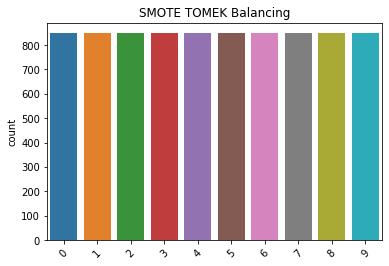

In [54]:

# sns.countplot(y_samp)
# plt.xticks(rotation=45)
# plt.title("SMOTE TOMEK Balancing")
# plt.savefig('Stomekcount.png')
# plt.show()

In [55]:
# le = LabelEncoder()
# le.fit(y_train)
# y_enc= le.transform(y_train)
# y_test=le.transform(y_test)

In [56]:
#y_test

1118            Colon
2615           Breast
6768         Pancreas
4799           Kidney
6489           Testis
            ...      
3557           Breast
2343            Brain
4070           Kidney
1334             Skin
5824    ProstateGland
Name: CancerType, Length: 1521, dtype: object

In [ ]:
# define the multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='sag', max_iter = 2000)
# define the model evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)#make n_repeats=10
# evaluate the model and collect the scores
n_scores = cross_val_score(model, X_samp, y_samp, scoring='accuracy', cv=cv, n_jobs=-1)
# report the model performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

In [ ]:
model.fit(X_samp,y_samp)

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
y_pred

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test_enc,y_pred)

In [ ]:
from sklearn import metrics
from sklearn.metrics import *

In [ ]:
#f1_score(y_test_enc, y_pred, average='micro') #use macro for multiclass because micro gives same value as accuracy

In [ ]:
f1_score(y_test_enc, y_pred, average='macro')

In [ ]:
metrics.accuracy_score(y_test_enc,y_pred)*100

In [ ]:
print(metrics.classification_report(y_test_enc, y_pred, digits=3))